Objective:

-Handle missing values, outliers, and inconsistencies.

-Leverage Python libraries (Matplotlib, Seaborn) for intuitive charts.

-Identification of high-potential products/categories.


Tools & Technologies:

Python (Pandas, NumPy), Jupyter Notebook

Data Visualization (Matplotlib, Seaborn)

data source: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/data

# **Basic Setup**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sns.set(style="whitegrid")

# **Data Loading & Quick Inspection**

In [4]:
df=pd.read_csv('Amazon Sale Report.csv',low_memory=False)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [6]:
df.shape

(128975, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [10]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [11]:
df.isnull().mean()

index                 0.000000
Order ID              0.000000
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Style                 0.000000
SKU                   0.000000
Category              0.000000
Size                  0.000000
ASIN                  0.000000
Courier Status        0.053282
Qty                   0.000000
currency              0.060438
Amount                0.060438
ship-city             0.000256
ship-state            0.000256
ship-postal-code      0.000256
ship-country          0.000256
promotion-ids         0.381105
B2B                   0.000000
fulfilled-by          0.695468
Unnamed: 22           0.380306
dtype: float64

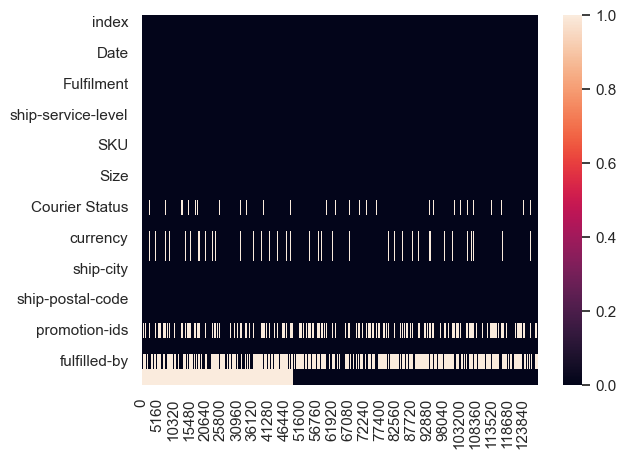

In [12]:
sns.heatmap(df.isnull().T)
plt.show()

# **Data Wrangling**

## **Drop Columns**

In [13]:
df.drop(['index','fulfilled-by','Unnamed: 22','promotion-ids','currency'],axis=1,inplace=True)
df.shape

(128975, 19)

## **Drop Duplicates**

In [14]:
df.duplicated().sum()

6

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df.duplicated(['Order ID','ASIN'],keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN,False


In [17]:
df.duplicated(['Order ID','ASIN']).sum()

1

In [18]:
df.drop_duplicates(['Order ID','ASIN'],inplace=True)
df.shape

(128968, 19)

## **Correct Data Types**

In [19]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,False


In [20]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

In [21]:
df['ship-postal-code']=df['ship-postal-code'].astype(object)

In [22]:
df['Date'].head()

0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: Date, dtype: object

In [23]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Date']=df['Date'].dt.date
df['Month'].head()

0    4
1    4
2    4
3    4
4    4
Name: Month, dtype: int32

### **Convert Currency from INR to USD**

In [24]:
#2025/05/02 Data
exchange_rate=0.012 
df['Amount']=df['Amount']*exchange_rate
df=df.rename(columns={'Amount':'Amount(USD)'})

## **Convert 'B2B' from Bool to Object**

In [25]:
df['B2B'].value_counts()

B2B
False    128097
True        871
Name: count, dtype: int64

In [26]:
df['B2B']=df['B2B'].astype(object).replace('1','Business').replace('0','Customer')

## **Fill N/A values**

In [27]:
df.isna().values.sum()

14796

In [28]:
df.isna().mean()

Order ID              0.000000
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Style                 0.000000
SKU                   0.000000
Category              0.000000
Size                  0.000000
ASIN                  0.000000
Courier Status        0.053285
Qty                   0.000000
Amount(USD)           0.060418
ship-city             0.000256
ship-state            0.000256
ship-postal-code      0.000256
ship-country          0.000256
B2B                   0.000000
Month                 0.000000
dtype: float64

In [29]:
df['Amount(USD)'].fillna(0,inplace=True)

In [30]:
df[['Courier Status','ship-city','ship-state','ship-postal-code','ship-country']]=df[['Courier Status','ship-city','ship-state','ship-postal-code','ship-country']].fillna('Unknown')

In [31]:
df.isna().values.sum()

0

# **Data Visualization**

## **Q2 Overall Trend of Net Sales**

In [32]:
df_net=df[df['Status']!='Cancelled']

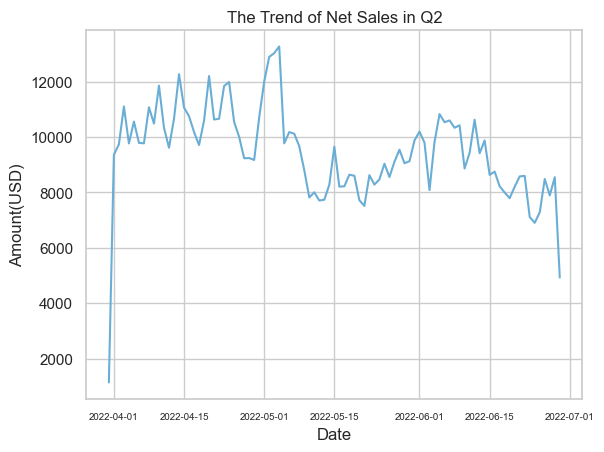

In [33]:
daily_amount=df_net.groupby('Date')['Amount(USD)'].sum().reset_index()
blues_5 = sns.color_palette("Blues", n_colors=5)
sns.lineplot(data=daily_amount,x='Date',y='Amount(USD)',color=blues_5[2])
plt.title('The Trend of Net Sales in Q2')
plt.xticks(size=7)
plt.grid(True)
plt.show()

The line graph depicts the trend of Net Sales during Q2 2022. After fluctuations in April, sales peaked at $13,267 in early May, followed by a consistent decline throughout the remainder of the quarter.

## **Distribution of Net Sales**

In [34]:
df_net['Amount(USD)'].describe()

count    110639.000000
mean          7.773419
std           3.413385
min           0.000000
25%           5.388000
50%           7.248000
75%           9.456000
max          67.008000
Name: Amount(USD), dtype: float64

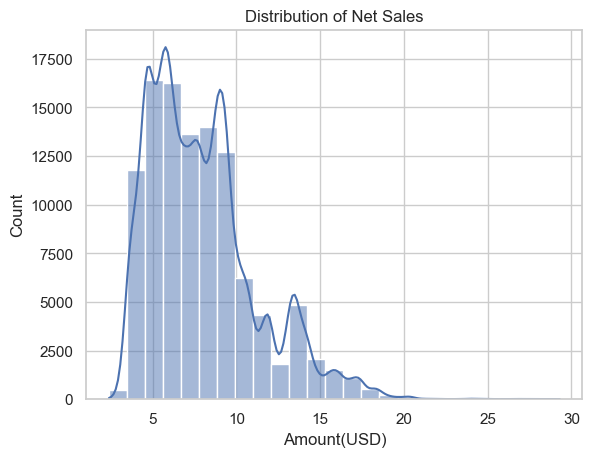

In [35]:
# q1=df_net['Amount(USD)'].quantile(.25)
# q3=df_net['Amount(USD)'].quantile(.75)
# iqr=q3-q1
lower_bound=2
# q1-1.5*iqr
upper_bound=30
# q3+1.5*iqr
df_rev=df_net[(df_net['Amount(USD)']>=lower_bound)&(df_net['Amount(USD)']<=upper_bound)]
sns.histplot(df_rev,x='Amount(USD)',kde=True,bins=25)
plt.title('Distribution of Net Sales')
plt.show()

The right-skewed net sales distribution indicates concentration of lower-and-middle-value orders, with the majority of values clustered around $4−$10 and a mean of $7.78, while a few higher-value orders create the long tail.

## **Monthly Net Sales in Q2**

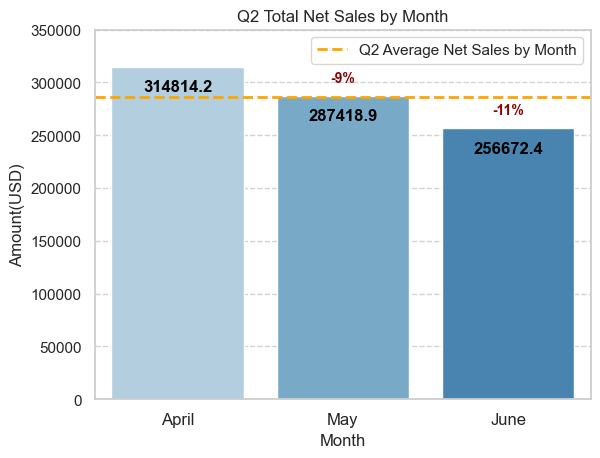

In [36]:
monthly_net=df_net[df_net['Month']!=3].groupby('Month')['Amount(USD)'].sum().reset_index()
monthly_net['mom_growth']=monthly_net['Amount(USD)'].pct_change().round(2)
avg_monthly_net=df_net[df_net['Month']!=3]['Amount(USD)'].sum()/3
ax1=sns.barplot(x=monthly_net['Month'],
               y=monthly_net['Amount(USD)'],
               hue=monthly_net['Month'],
               palette=blues_5[1:4],
               legend=False)
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        color="black",
        xytext=(0, -20),
        textcoords="offset points",
        fontweight='bold'
    )
for i, row in monthly_net.iterrows():
    if pd.notna(row["mom_growth"]):
        growth_text = f"{row['mom_growth']*100:.0f}%"
        ax1.text(
            i, row["Amount(USD)"] + 10000, growth_text,
            ha="center", va="bottom", fontsize=10,
            color="darkred" if row["mom_growth"] < 0 else "green",
            fontweight='bold'
        )

ax1.yaxis.grid(linestyle='--',color = 'lightgrey')
ticks = ax1.get_xticks()
ax1.set_xticks(ticks)
ax1.set_xticklabels(['April','May','June'],fontsize=12)
plt.axhline(avg_monthly_net, linestyle='--', color='orange',linewidth=2, label='Q2 Average Net Sales by Month')
plt.ylim(0,350000)
plt.legend()
plt.title('Q2 Total Net Sales by Month')
plt.show()


Net sales showed a consecutive monthly decline in Q2, dropping 9% MoM in May and 11% in June, reflecting a sustained downward trend. The quarterly average reached $286K.

## **Monthly Quantity Sold in Q2**

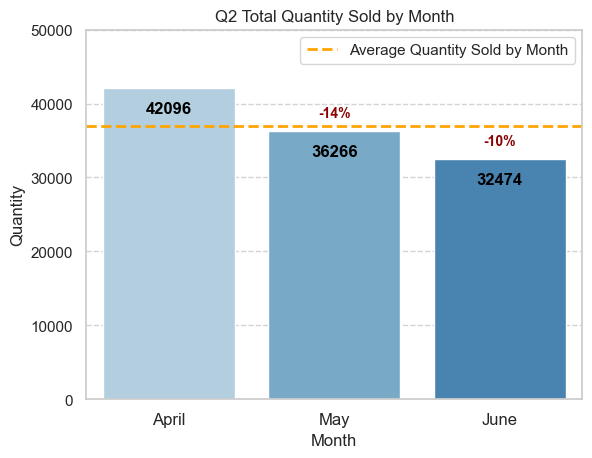

In [37]:
monthly_qty=df_net[df_net['Month']!=3].groupby('Month')['Qty'].sum().reset_index()
monthly_qty['mom_growth']=monthly_qty['Qty'].pct_change().round(2)
avg_monthly_qty=df_net[df_net['Month']!=3]['Qty'].sum()/3
ax2=sns.barplot(data=monthly_qty,x='Month',y='Qty',
               hue='Month',
               palette=blues_5[1:4],
               legend=False)
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():1.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        color="black",
        xytext=(0, -20),
        textcoords="offset points",
        fontweight='bold'
    )
for i, row in monthly_qty.iterrows():
    if pd.notna(row["mom_growth"]):
        growth_text = f"{row['mom_growth']*100:.0f}%"
        ax2.text(
            i, row["Qty"] + 1500, growth_text,
            ha="center", va="bottom", fontsize=10,
            color="darkred" if row["mom_growth"] < 0 else "green",
            fontweight='bold'
        )
ax2.yaxis.grid(linestyle='--',color = 'lightgrey')
ticks = ax2.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels(['April','May','June'],fontsize=12)
plt.ylim(0,50000)
plt.axhline(avg_monthly_qty, linestyle='--', color='orange',linewidth=2, label='Average Quantity Sold by Month')
plt.title('Q2 Total Quantity Sold by Month')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Product sales volume mirrored the declining trend of net sales in Q2, showing parallel contraction across all months.

## **Fulfilment Distribution**

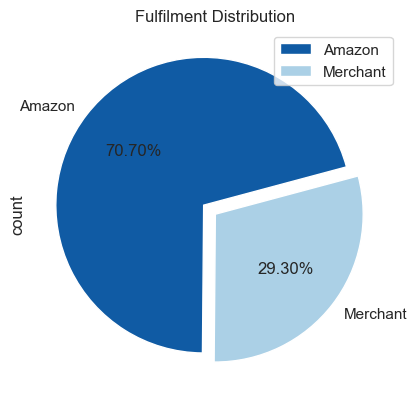

In [38]:
df_net['Fulfilment'].value_counts().plot.pie(startangle=15,
                                                autopct='%1.2f%%',
                                                legend=True,
                                                colors=[blues_5[4],blues_5[1]],
                                                explode=[0.1,0]
                                               )
plt.title('Fulfilment Distribution')
plt.legend(loc='upper right')
plt.show()

Amazon-fulfilled orders accounted for 70% of total order volume, with merchant-fulfilled orders comprising the remaining 30%.

## **Top10 States**

In [39]:
df_state=df_net.groupby(['ship-state'])['Amount(USD)'].sum().reset_index().sort_values(by='Amount(USD)',ascending=False)
df_state

,ship-state,Amount(USD)
27,MAHARASHTRA,146685.972
22,KARNATAKA,115799.772
55,TELANGANA,75481.536
57,UTTAR PRADESH,74233.476
54,TAMIL NADU,71446.344
...,...,...
43,Pondicherry,6.348
67,rajsthan,6.252
2,AR,5.916
51,Rajsthan,5.316


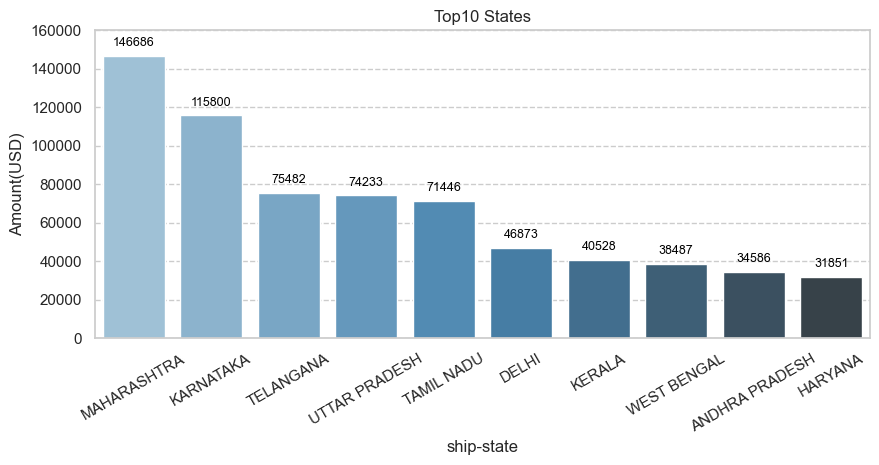

In [40]:
df_state=df_net.groupby(['ship-state'])['Amount(USD)'].sum().reset_index().sort_values(by='Amount(USD)',ascending=False).head(10)
plt.figure(figsize=(10,4))
ax=sns.barplot(df_state,x='ship-state',y='Amount(USD)',hue='ship-state',palette='Blues_d')
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():1.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
        xytext=(0, 5),
        textcoords="offset points"
    )
plt.ylim(0,160000)
plt.xticks(rotation=30)
ax.yaxis.grid(linestyle='--')
plt.title('Top10 States')
plt.show()

Maharashtra (home to Mumbai, India's financial capital) leads in order volume. The top 3 states (Maharashtra, Karnataka, and Telangana) collectively contribute 50% of India's net sales.

## **Pareto Analysis on Categories**

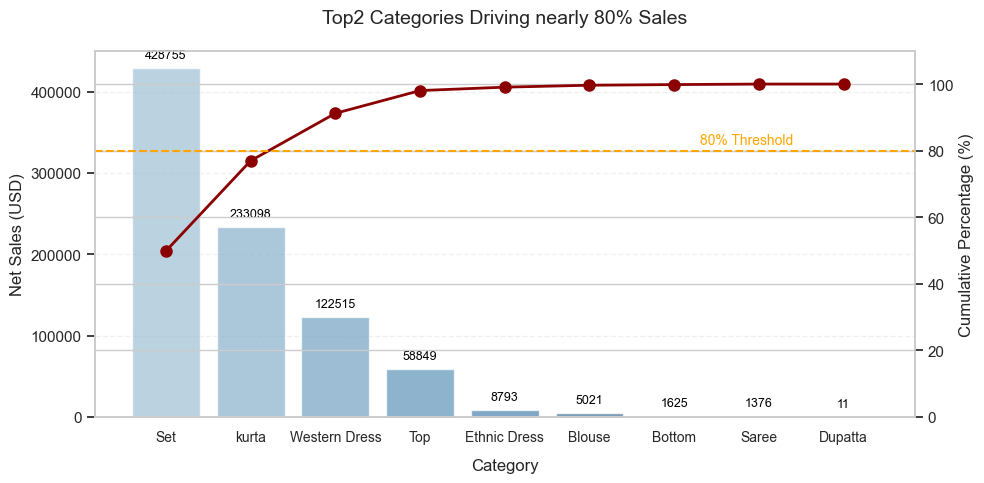

In [41]:
ctg_sales = df_net.groupby('Category')['Amount(USD)'].sum().sort_values(ascending=False).reset_index()
ctg_sales['Cumulative %'] = (ctg_sales['Amount(USD)'].cumsum() / ctg_sales['Amount(USD)'].sum()) * 100

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(x=ctg_sales['Category'], y=ctg_sales['Amount(USD)'], 
               color='#1f77b4', alpha=0.7, palette='Blues_d',hue=ctg_sales['Category'],ax=ax1)
ax1.set_xlabel('Category', fontsize=12, labelpad=10)
ax1.set_ylabel('Net Sales (USD)', fontsize=12)
ax1.tick_params(axis='x', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():1.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
        xytext=(0, 5),
        textcoords="offset points"
    )

ax2 = ax1.twinx()
line = ax2.plot(ctg_sales['Category'], ctg_sales['Cumulative %'], 
                color='darkred', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax2.set_ylim(0, 110)

ax2.axhline(80, color='orange', linestyle='--', linewidth=1.5)
ax2.text(len(ctg_sales)*0.7, 82, '80% Threshold', 
         color='orange', fontsize=10, ha='left')


plt.title('Top2 Categories Driving nearly 80% Sales', 
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Top Product Categories in India (by Net Sales):
Set (ethnic wear ensembles) contributes 50% of total net sales.
Kurta accounts for 30%, reflecting strong cultural preference.
These two categories represent nearly 80% of India’s total e-commerce fashion sales.

## **Sales Quantity by Category & Size**

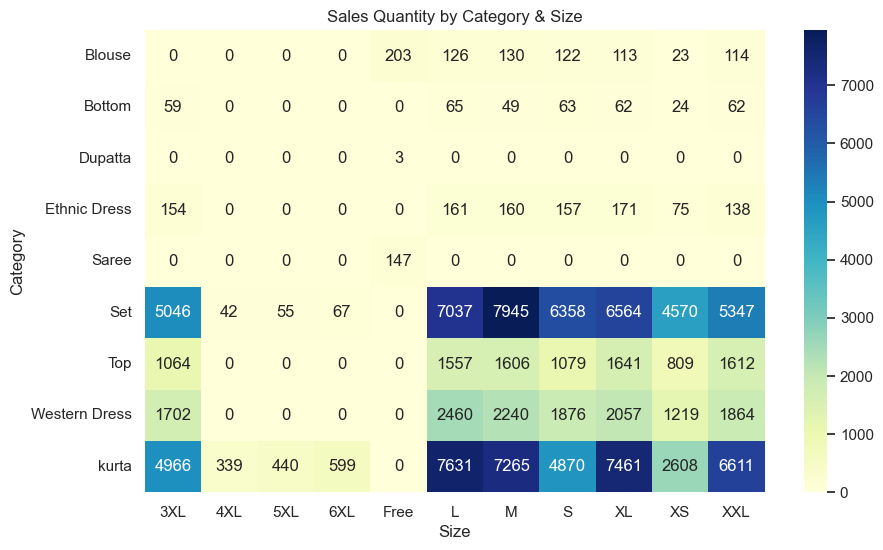

In [42]:
size_category = df_net.pivot_table(index='Category', columns='Size', 
                              values='Qty', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(size_category, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Quantity by Category & Size')
plt.show()

In terms of clothing sizes, the top sellers are M, L and XL.

# **Insights**

In India, April is a month brimming with significant festivals and celebrations. From the harvest festival of Baisakhi/Vaisakhi in North India to Tamil New Year (Puthandu) and Bengali New Year (Pohela Boishakh), the tradition of purchasing new clothing is deeply intertwined with cultural customs. 

As apparel sales surge during April with order volumes peaking, demand gradually tapers off through May and June. Net sales experienced sequential monthly decline of 9% (May) and 11% (June).

Top 3 States (Maharashtra, Karnataka, Telangana) drive 50% sales.

Sets & Kurtas dominate 80% of fashion sales.

M, L, XL sizes cover 85% of orders.

# **AUTHOR: Valeska Tsui**

## **Email: caroline.xhc@gmail.com**

-------------------------------------------------------------------------------------------------------------------------------------------------------